# Exploring the Influence of Social Life on Academics


### Silvia Camara, Brenna Leahy, Maria Gund


Our project will be based on a dataset from Kaggle that explores the effect of socioeconomic factors on students grades from a survey of students’ math and portuguese language courses in secondary school. The dataset contains data gathered from Portuguese students who were surveyed on several different aspects of their life, including familial and social relations as well as their academic habits and socio-economic status.We plan to use the data set to predict a student's final grade in a class based on different social factors, including the amount of time he or she spends going out with friends, the quality of their family relationships, whether they take part in after-school activities, as well as the size of their family. Using several features, we want to see if there is a correlation between a student's social life and their grades. We also want to see if there is one specific feature (or a combination of features) that better predicts whether a student's grade will be above average, average, or below average. 

We plan to explore this topic by using principal component analysis to determine which parts of the data are most useful as well as Naive Bayes to present the data comprehensively and analyze it.


In [1]:
# Allow inline plotting of figures.
%matplotlib inline

# Import useful libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model, datasets


# Read the file into a DataFrame.
math_data = pd.read_csv("student-mat.csv")
port_data = pd.read_csv("student-por.csv")
#data = data.fillna(0)
#data = data.dropna()

In [2]:
X_math = math_data.iloc[:, :-1]  # features
Y_math = math_data.iloc[:, -1]  # class

X_port = port_data.iloc[:, :2]  # features
Y_port = port_data.iloc[:, -1]  # class

print(X_math.head())
print()
print(Y_math.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  romantic famrel  freetime  goout  Dalc Walc health absences  G1  G2  
0       no      4         3      4     1    1      3        6   5   6  
1       no      5         3      3     1    1      3        4   5   5  
2       no      4         3      2     2    3      3       10   7   8  
3      yes      3         2      2     1    1      5        2  15  14  
4       no      4         3      2     1    2      5        4   6  10  

[5 rows x 32 columns]

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64


## Math Data Set

In [3]:
# Output the first few rows of the math dataset.
math_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Portuguese Data Set

In [4]:
# Output the first few rows of the portuguese dataset.
port_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Pretty sure I'm doing this wrong

In [ ]:
print(X_math.head())

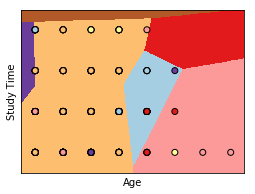

In [9]:
X_math = math_data.iloc[:, :-1]  # features
Y_math = math_data.iloc[:, -1]  # class
h = 0.01

X_math = pd.get_dummies(X_math)
X_math = X_math.iloc[:, [0,4]] #create classifier using age and study time

logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_math, Y_math)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_math.iloc[:, 0].min() - .5, X_math.iloc[:, 0].max() + .5
y_min, y_max = X_math.iloc[:, 1].min() - .5, X_math.iloc[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
#y_pred = logreg.predict(X_math.iloc[:, 0:1])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_math.iloc[:, 0], X_math.iloc[:, 1], c=Y_math, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('Study Time')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xticks(())
plt.yticks(())

plt.show()

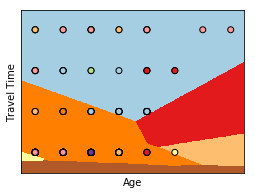

In [24]:
X_math = math_data.iloc[:, :-1]  # features
Y_math = math_data.iloc[:, -1]  # class
h = 0.01

X_math = pd.get_dummies(X_math)
X_math = X_math.iloc[:, [0,5]] #create classifier using age and study time

logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_math, Y_math)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_math.iloc[:, 0].min() - .5, X_math.iloc[:, 0].max() + .5
y_min, y_max = X_math.iloc[:, 1].min() - .5, X_math.iloc[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
#y_pred = logreg.predict(X_math.iloc[:, 0:1])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_math.iloc[:, 0], X_math.iloc[:, 1], c=Y_math, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('Travel Time')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xticks(())
plt.yticks(())

plt.show()

   age  G2
0   18   6
1   17   5
2   15   8
3   15  14
4   16  10


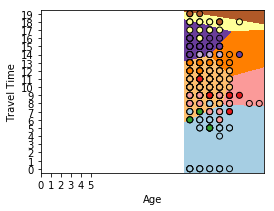

   Medu  G2
0     4   6
1     1   5
2     1   8
3     4  14
4     3  10


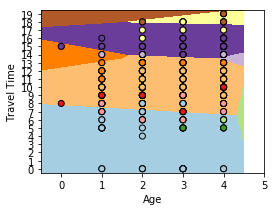

   Fedu  G2
0     4   6
1     1   5
2     1   8
3     2  14
4     3  10


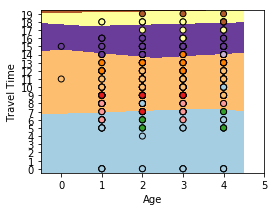

   traveltime  G2
0           2   6
1           1   5
2           1   8
3           1  14
4           1  10


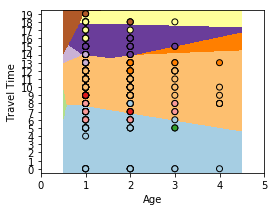

   studytime  G2
0          2   6
1          2   5
2          2   8
3          3  14
4          2  10


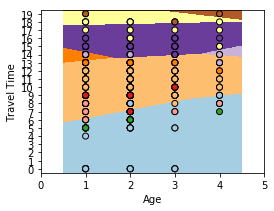

   failures  G2
0         0   6
1         0   5
2         3   8
3         0  14
4         0  10


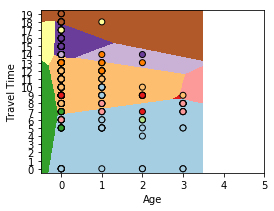

   famrel  G2
0       4   6
1       5   5
2       4   8
3       3  14
4       4  10


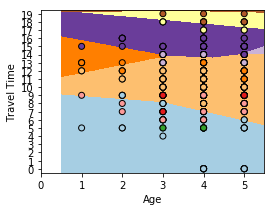

   freetime  G2
0         3   6
1         3   5
2         3   8
3         2  14
4         3  10


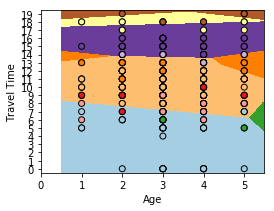

   goout  G2
0      4   6
1      3   5
2      2   8
3      2  14
4      2  10


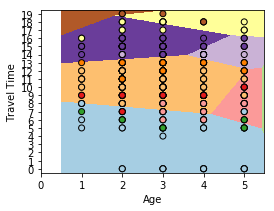

   Dalc  G2
0     1   6
1     1   5
2     2   8
3     1  14
4     1  10


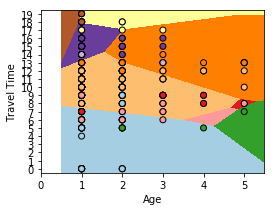

   Walc  G2
0     1   6
1     1   5
2     3   8
3     1  14
4     2  10


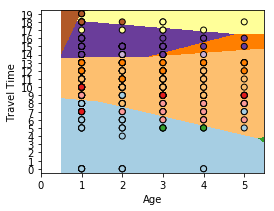

   health  G2
0       3   6
1       3   5
2       3   8
3       5  14
4       5  10


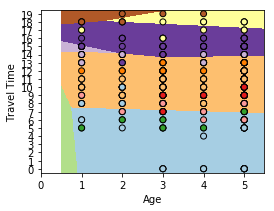

   absences  G2
0         6   6
1         4   5
2        10   8
3         2  14
4         4  10


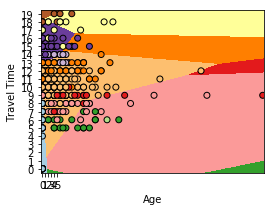

   G1  G2
0   5   6
1   5   5
2   7   8
3  15  14
4   6  10


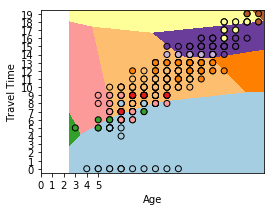

   G2  G2
0   6   6
1   5   5
2   8   8
3  14  14
4  10  10


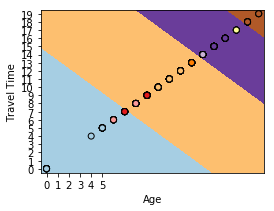

   school_GP  G2
0          1   6
1          1   5
2          1   8
3          1  14
4          1  10


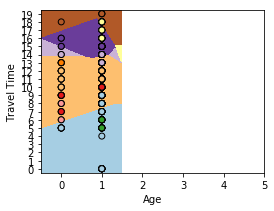

   school_MS  G2
0          0   6
1          0   5
2          0   8
3          0  14
4          0  10


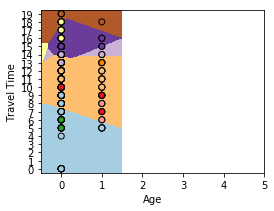

   sex_F  G2
0      1   6
1      1   5
2      1   8
3      1  14
4      1  10


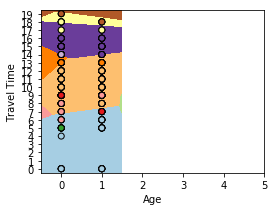

   sex_M  G2
0      0   6
1      0   5
2      0   8
3      0  14
4      0  10


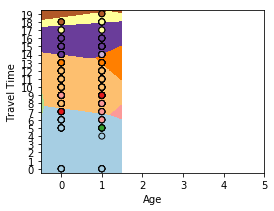

   address_R  G2
0          0   6
1          0   5
2          0   8
3          0  14
4          0  10


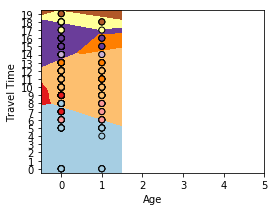

   address_U  G2
0          1   6
1          1   5
2          1   8
3          1  14
4          1  10


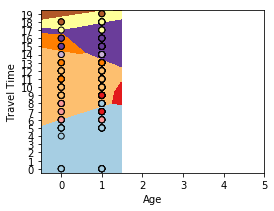

   famsize_GT3  G2
0            1   6
1            1   5
2            0   8
3            1  14
4            1  10


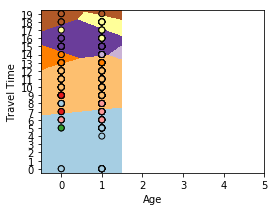

   famsize_LE3  G2
0            0   6
1            0   5
2            1   8
3            0  14
4            0  10


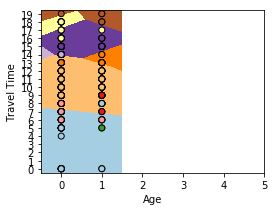

   Pstatus_A  G2
0          1   6
1          0   5
2          0   8
3          0  14
4          0  10


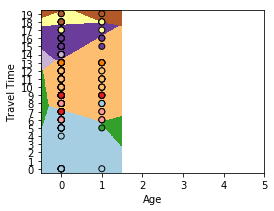

   Pstatus_T  G2
0          0   6
1          1   5
2          1   8
3          1  14
4          1  10


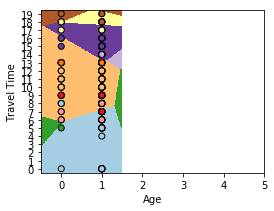

   Mjob_at_home  G2
0             1   6
1             1   5
2             1   8
3             0  14
4             0  10


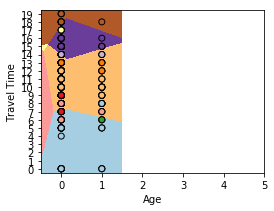

   Mjob_health  G2
0            0   6
1            0   5
2            0   8
3            1  14
4            0  10


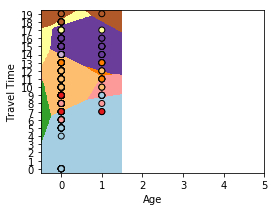

   Mjob_other  G2
0           0   6
1           0   5
2           0   8
3           0  14
4           1  10


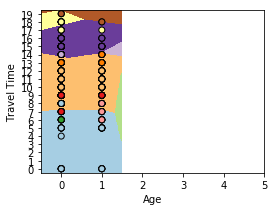

   Mjob_services  G2
0              0   6
1              0   5
2              0   8
3              0  14
4              0  10


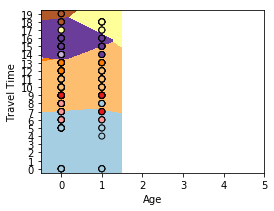

   Mjob_teacher  G2
0             0   6
1             0   5
2             0   8
3             0  14
4             0  10


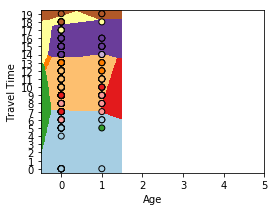

   Fjob_at_home  G2
0             0   6
1             0   5
2             0   8
3             0  14
4             0  10


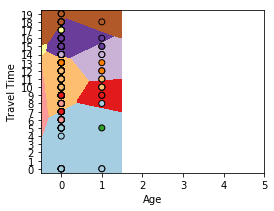

   Fjob_health  G2
0            0   6
1            0   5
2            0   8
3            0  14
4            0  10


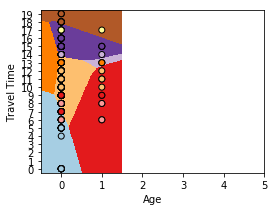

   Fjob_other  G2
0           0   6
1           1   5
2           1   8
3           0  14
4           1  10


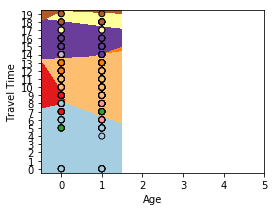

   Fjob_services  G2
0              0   6
1              0   5
2              0   8
3              1  14
4              0  10


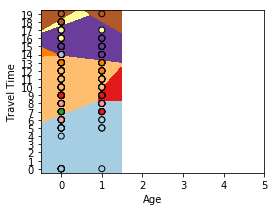

   Fjob_teacher  G2
0             1   6
1             0   5
2             0   8
3             0  14
4             0  10


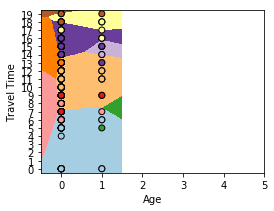

   reason_course  G2
0              1   6
1              1   5
2              0   8
3              0  14
4              0  10


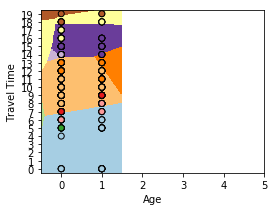

   reason_home  G2
0            0   6
1            0   5
2            0   8
3            1  14
4            1  10


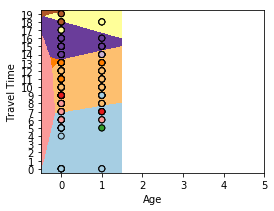

   reason_other  G2
0             0   6
1             0   5
2             1   8
3             0  14
4             0  10


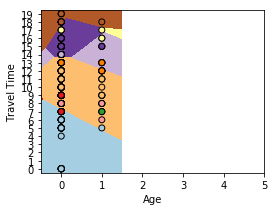

   reason_reputation  G2
0                  0   6
1                  0   5
2                  0   8
3                  0  14
4                  0  10


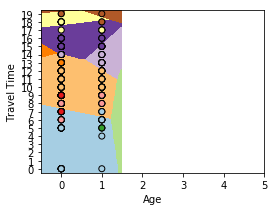

   guardian_father  G2
0                0   6
1                1   5
2                0   8
3                0  14
4                1  10


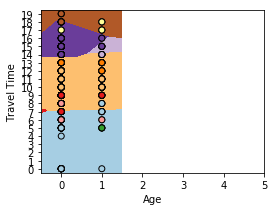

   guardian_mother  G2
0                1   6
1                0   5
2                1   8
3                1  14
4                0  10


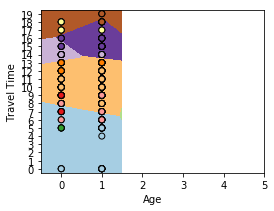

   guardian_other  G2
0               0   6
1               0   5
2               0   8
3               0  14
4               0  10


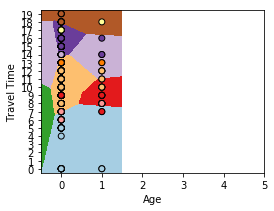

   schoolsup_no  G2
0             0   6
1             1   5
2             0   8
3             1  14
4             1  10


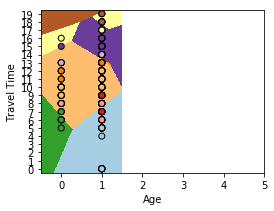

   schoolsup_yes  G2
0              1   6
1              0   5
2              1   8
3              0  14
4              0  10


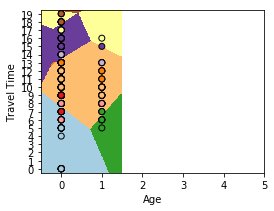

   famsup_no  G2
0          1   6
1          0   5
2          1   8
3          0  14
4          0  10


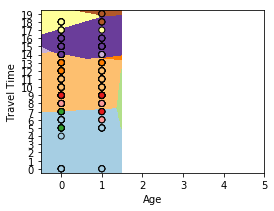

   famsup_yes  G2
0           0   6
1           1   5
2           0   8
3           1  14
4           1  10


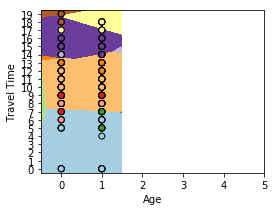

   paid_no  G2
0        1   6
1        1   5
2        0   8
3        0  14
4        0  10


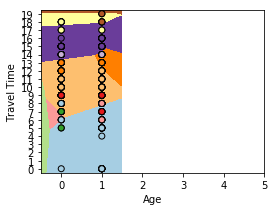

   paid_yes  G2
0         0   6
1         0   5
2         1   8
3         1  14
4         1  10


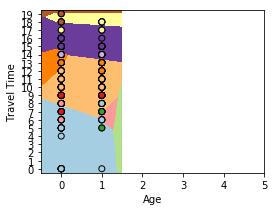

   activities_no  G2
0              1   6
1              1   5
2              1   8
3              0  14
4              1  10


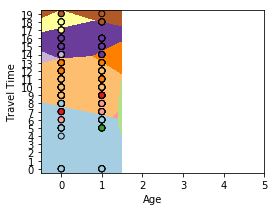

   activities_yes  G2
0               0   6
1               0   5
2               0   8
3               1  14
4               0  10


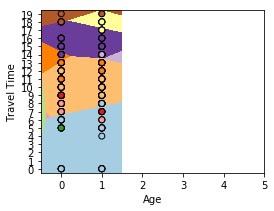

   nursery_no  G2
0           0   6
1           1   5
2           0   8
3           0  14
4           0  10


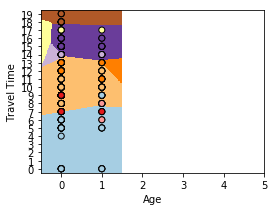

   nursery_yes  G2
0            1   6
1            0   5
2            1   8
3            1  14
4            1  10


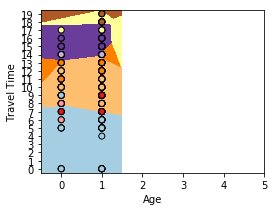

   higher_no  G2
0          0   6
1          0   5
2          0   8
3          0  14
4          0  10


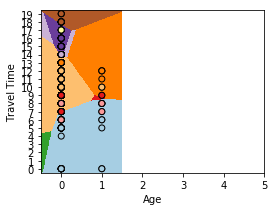

   higher_yes  G2
0           1   6
1           1   5
2           1   8
3           1  14
4           1  10


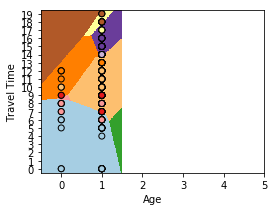

   internet_no  G2
0            1   6
1            0   5
2            0   8
3            0  14
4            1  10


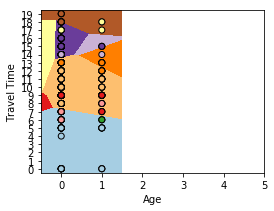

   internet_yes  G2
0             0   6
1             1   5
2             1   8
3             1  14
4             0  10


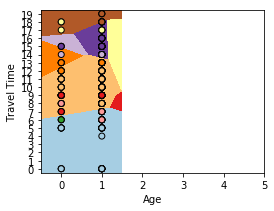

   romantic_no  G2
0            1   6
1            1   5
2            1   8
3            0  14
4            1  10


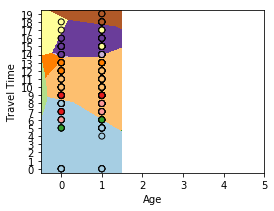

   romantic_yes  G2
0             0   6
1             0   5
2             0   8
3             1  14
4             0  10


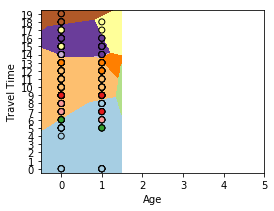

IndexError: positional indexers are out-of-bounds

In [107]:
X_math = math_data.iloc[:, :-1]  # features
Y_math = math_data.iloc[:, -1]  # class
from pylab import *

h = 0.01
for i in range(59):
    X_math = math_data.iloc[:, :-1]  # features
    Y_math = math_data.iloc[:, -1]  # class
    X_math = pd.get_dummies(X_math)
    X_math = X_math.iloc[:, [i,14]] #create classifier using age and study time
    print(X_math.head())
    
    logreg = linear_model.LogisticRegression(C=1e5)
    logreg.fit(X_math, Y_math)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_math.iloc[:, 0].min() - .5, X_math.iloc[:, 0].max() + .5
    y_min, y_max = X_math.iloc[:, 1].min() - .5, X_math.iloc[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
    #y_pred = logreg.predict(X_math.iloc[:, 0:1])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X_math.iloc[:, 0], X_math.iloc[:, 1], c=Y_math, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Age')
    plt.ylabel('Travel Time')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.xticks((arange(6) ))
    plt.yticks(( arange(20)))

    plt.show()

In [ ]:
h = .02  # step size in the mesh

X_math = pd.get_dummies(X_math)
print(X_math.head())
X_math = X_math.iloc[:, [0,4]] #create classifier using age and study time
math_rfc = RandomForestClassifier(max_depth=4)
math_rfc.fit(X_math, Y_math)
print(X_math.head())

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X_math.iloc[:, 0].min() - 1, X_math.iloc[:, 0].max() + 1
y_min, y_max = X_math.iloc[:, 1].min() - 1, X_math.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = math_rfc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_math.iloc[:, 0], X_math.iloc[:, 1], c=Y_math, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Random Forest Classifier")